In [1]:
import pandas as pd
import numpy as np

# Spotify Song Classification

## Introduction

The dataset of this mini-project is taken from [Kaggle](https://www.kaggle.com/geomack/spotifyclassification). The purpose of this mini project is to gain insight into how the data creator's favorite song is and to make a prediction whether he likes the song by the criteria provided.

[Read more](https://opendatascience.com/a-machine-learning-deep-dive-into-my-spotify-data/)

![title](https://opendatascience.com/wp-content/uploads/2017/05/shot2.jpg)
![title](https://opendatascience.com/wp-content/uploads/2017/05/shot1.jpg)
**target**: Each song is labeled "1" meaning the data creator likes it and "0" for songs he don't likes.

## Load the Data

In [2]:
data = pd.read_csv('dataset/data.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


I dropped the **Unnamed: 0** column because it's a duplicate of the index.

## Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [7]:
data.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

The observation shows that:
- Most of the columns are numeric features.
- There is no missing value

### Correlation

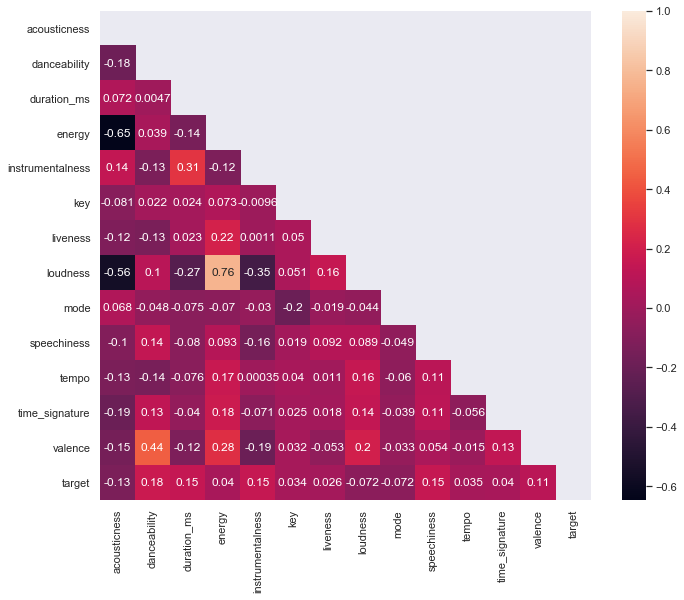

In [8]:
corr = data.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, annot=True);

All features have low correlation with the target label. I will engineer some of the features later.

### Outliers

#### 1. Features with range [0, 1]

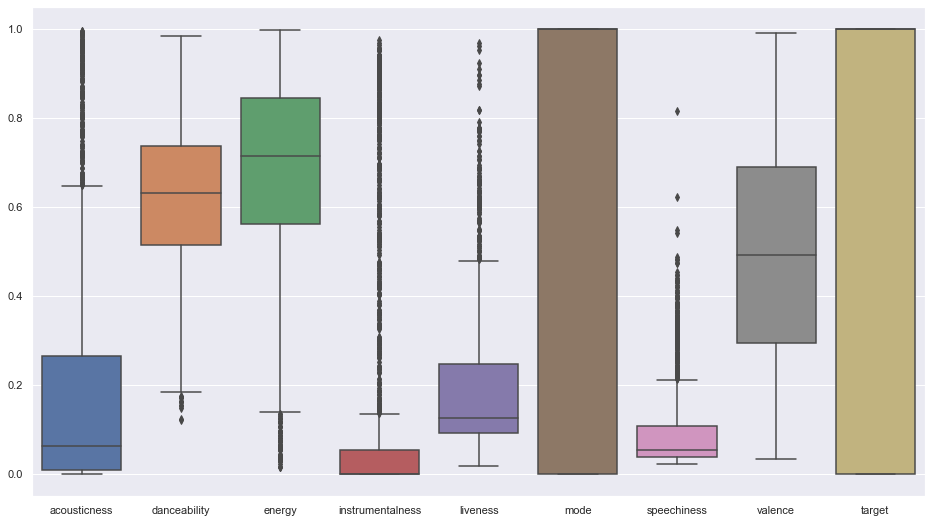

In [9]:
plt.figure(figsize=(16,9))
sns.boxplot(data=data.drop(['duration_ms', 'key', 'loudness', 'tempo', 'time_signature'], axis=1));

#### 2. Other Features

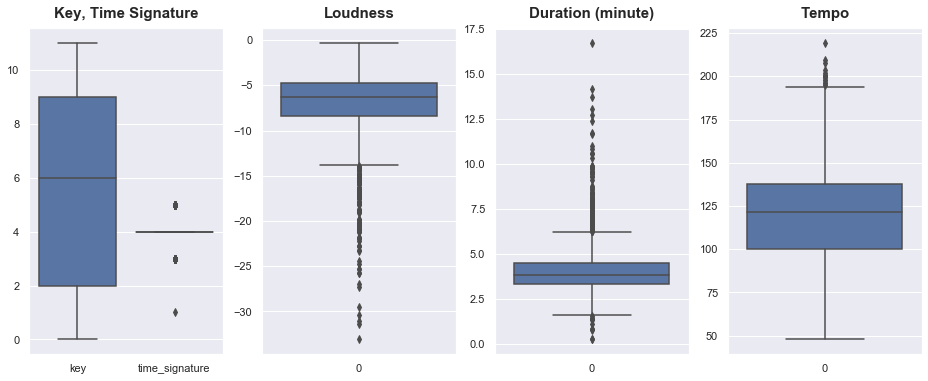

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,6))

sns.boxplot(ax=ax1, data=data[['key', 'time_signature']])
ax1.set_title('Key, Time Signature', fontweight='bold', size=15, pad=10)

sns.boxplot(ax=ax2, data=data['loudness'], orient='v')
ax2.set_title('Loudness', fontweight='bold', size=15, pad=10)

sns.boxplot(ax=ax3, data=data['duration_ms'] / 60000, orient='v')
ax3.set_title('Duration (minute)', fontweight='bold', size=15, pad=10)

sns.boxplot(ax=ax4, data=data['tempo'], orient='v')
ax4.set_title('Tempo', fontweight='bold', size=15, pad=10)

plt.show()

### Additional Information

#### 1. Data Creator's Favorite

In [11]:
data.groupby('target').mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
target,,,,,,,,,,,,,
0,0.221670,0.589648,234140.495486,0.673138,0.091135,5.218656,0.186700,-6.811743,0.647944,0.078659,120.666027,3.957874,0.469836
1,0.154279,0.646547,258197.574510,0.689826,0.174486,5.463725,0.194895,-7.353329,0.577451,0.106354,122.519382,3.978431,0.523186


From the observation, I don't think there is any particular combination the data creator likes. Everything seems random. However, there are several preferences, namely:
- Not so acoustic
- More minor senses
- Higher danceability
- Greater likelihood the track contains no vocal content
- More spoken words or vocals
- Sounds more positive *(happy, cheerful, euphoric)*

#### 2. Energy  VS  Acousticness, Loudness

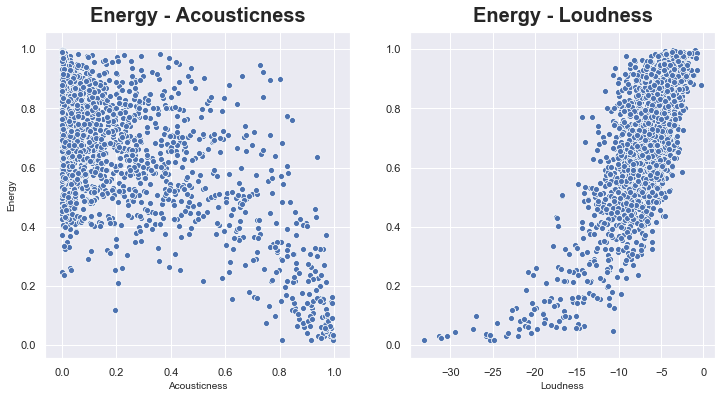

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(ax=ax1, x='acousticness', y='energy', data=data)
ax1.set_title('Energy - Acousticness', fontweight='bold', size=20, pad=10)
ax1.set_xlabel('Acousticness', fontsize=10)
ax1.set_ylabel('Energy', fontsize=10)

sns.scatterplot(ax=ax2, x='loudness', y='energy', data=data)
ax2.set_title('Energy - Loudness', fontweight='bold', size=20, pad=10)
ax2.set_xlabel('Loudness', fontsize=10)
ax2.set_ylabel('')

plt.show()

The first graph **(Energy - Acousticness)** shows that:
- The higher the acoustics, the lower the energy will be.
- Acoustics is **inversely proportional** to energy.

The second graph **(Energy - Loudness)** shows that:
- The higher the loudness, the higher the energy will be.
- Loudness is **directly proportional** to the energy.

## Modeling

In [13]:
# Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Model Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Pipeline
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

The features seem to have so many outliers, so I consider the following models because they are robust (not sensitive to outliers):
- DecisionTreeClassifier
- RandomForestClassifier
- ExtraTreesClassifier
- SVC *(Support Vector Classifier)*
- XGBClassifier *(Extreme Gradient Boosting Classifier)*

### Train Test Split

In [14]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Engineering

In [15]:
fe = data.drop(['target', 'song_title', 'artist'], axis=1)

top_corr = []
for col in fe.columns:
    for row in fe.columns:
        if col != row:
            val_X = data['target'].corr(fe[col] * fe[row])
            val_p = data['target'].corr((fe[col]**2 + fe[row]**2)**0.5)
            
            top_corr.append(['{} X {}'.format(col, row), val_X])
            top_corr.append(['{} + {}'.format(col, row), val_p])

top_corr = sorted(top_corr, key=lambda item: -item[1])[::(len(top_corr) - 1)]

for key, value in top_corr:
    print('{}: {:.3f}'.format(key, value))

danceability X duration_ms: 0.252
loudness X energy: -0.358


The product of danceability with duration and loudness with energy produce new features with a relatively higher correlation than previous features. One is positively correlated while the other has a negative correlation. Hopefully, this new feature will improve the model's predictability.

### Model Selection

In [16]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        return self
    
    def transform(self, X):
        X = X.copy()
        X['D2'] = X['danceability'] * X['duration_ms']
        X['EL'] = X['energy'] * X['loudness']
        return X

In [17]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        return self
    
    def transform(self, X):
        return X.drop(self.columns, axis=1)

In [18]:
features = Pipeline([
    ('new', FeatureEngineering()),
    ('drop', DropColumn(['song_title', 'artist']))
])

In [19]:
estimators = {
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'ET': ExtraTreesClassifier(),
    'SVC': SVC(),
    'XGB': XGBClassifier()
}

Xt = features.fit_transform(X)
for name, estimator in estimators.items():
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(estimator, Xt, y, cv=cv)
    print('{}: {:.3f}'.format(name, scores.mean()))

DT: 0.667
RF: 0.775
ET: 0.765
SVC: 0.608
XGB: 0.760


3 models have comparable predictive accuracy. I'm going to dive into these models a little deeper by tuning them to find out which one will perform best.

### Accuracy - Max Depth

In [20]:
depths = range(1, 31)
RF_acc = []
ET_acc = []
XGB_acc = []

X_train_T = features.fit_transform(X_train)
X_test_T = features.fit_transform(X_test)

for depth in depths:
    RF_acc.append(
        RandomForestClassifier(
            max_depth=depth,
            random_state=0
        ).fit(X_train_T, y_train).score(X_test_T, y_test)
    )
    
    ET_acc.append(
        ExtraTreesClassifier(
            max_depth=depth,
            random_state=0
        ).fit(X_train_T, y_train).score(X_test_T, y_test)
    )
    
    XGB_acc.append(
        XGBClassifier(
            max_depth=depth,
            random_state=0
        ).fit(X_train_T, y_train).score(X_test_T, y_test)
    )

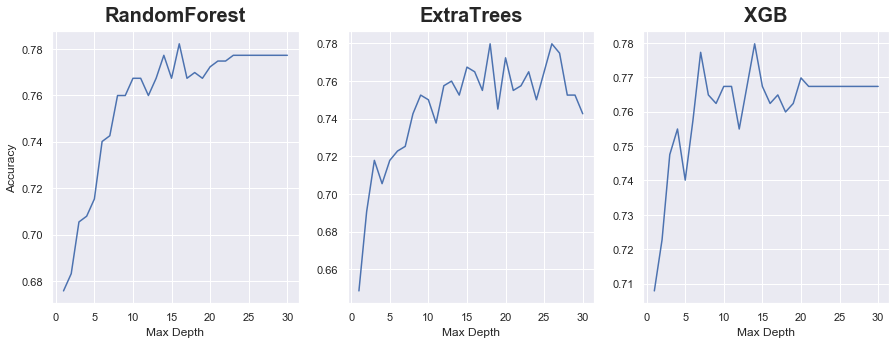

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(ax=ax1, x=depths, y=RF_acc)
ax1.set_title('RandomForest', fontweight='bold', size=20, pad=10)
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')

sns.lineplot(ax=ax2, x=depths, y=ET_acc)
ax2.set_title('ExtraTrees', fontweight='bold', size=20, pad=10)
ax2.set_xlabel('Max Depth')

sns.lineplot(ax=ax3, x=depths, y=XGB_acc)
ax3.set_title('XGB', fontweight='bold', size=20, pad=10)
ax3.set_xlabel('Max Depth')

plt.show()

The observation shows that each model achieves its maximum accuracy for:
- **RandomForest** at the max depth of **15 to 20**.
- **ExtraTrees** at the max depth of **15 to 20**.
- **XGB** at the max depth of **10 to 15**.

### Fitting Models

#### 1. RandomForestClassifier

In [22]:
est_RF = Pipeline([
    ('features', features),
    ('classifier', GridSearchCV(RandomForestClassifier(), param_grid={'max_depth': range(15, 20),
                                                                      'min_samples_leaf': [10, 20, 30]},
                                cv=5, n_jobs=-1, verbose=1))
])
est_RF.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   34.7s finished


#### 2. ExtraTreesClassifier

In [23]:
est_ET = Pipeline([
    ('features', features),
    ('classifier', GridSearchCV(ExtraTreesClassifier(), param_grid={'max_depth': range(15, 20),
                                                                    'min_samples_leaf': [10, 20, 30]},
                                cv=5, n_jobs=-1, verbose=1))
])
est_ET.fit(X_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   19.6s finished


#### 3. XGBClassifier

In [24]:
est_XGB = Pipeline([
    ('features', features),
    ('classifier', GridSearchCV(XGBClassifier(), param_grid={'max_depth': range(10, 15),
                                                             'learning_rate': [0.1, 0.5],
                                                             'subsample': [0.5, 0.75],
                                                             'gamma': [0.1, 0.5, 0.75]},
                                cv=5, n_jobs=-1, verbose=1))
])
est_XGB.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


### Scoring

In [25]:
score = pd.DataFrame({'Train': [est_RF.score(X_train, y_train),
                                est_ET.score(X_train, y_train),
                                est_XGB.score(X_train, y_train)],
              
                      'Test': [est_RF.score(X_test, y_test),
                               est_ET.score(X_test, y_test),
                               est_XGB.score(X_test, y_test)]},
                    
                     index=['RandomForest', 'ExtraTrees', 'XGB'])

score.columns.name = 'Accuracy'
score.index.name = 'Model'
score

Accuracy,Train,Test
Model,,
RandomForest,0.873528,0.752475
ExtraTrees,0.807192,0.732673
XGB,0.991940,0.772277


In [26]:
pd.DataFrame({'Predict': est_XGB.predict(X_test), 'True': y_test}).sample(5)

,Predict,True
1325,0,0
721,0,1
1616,0,0
1175,0,0
1924,1,0


The scores seem pretty close to each other, but XGBClassifier is the best performing one. I will use the **XGBClassifier** as it is a famous model on Kaggle and usually gives better results.